### 모듈 불러오기

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

In [12]:
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

display(train.shape, test.shape)

(1000000, 19)

(1000000, 18)

In [4]:
set(train.columns) - set(test.columns)

{'Delay'}

In [6]:
train['Delay'].value_counts()

Not_Delayed    210001
Delayed         45000
Name: Delay, dtype: int64

In [56]:
train['Delay'].isna().sum()

744999

- ID : 샘플 고유 id
항공편 운항 관련 정보
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
(IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed)

In [7]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,NaN
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,NaN
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,NaN
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,NaN
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,NaN


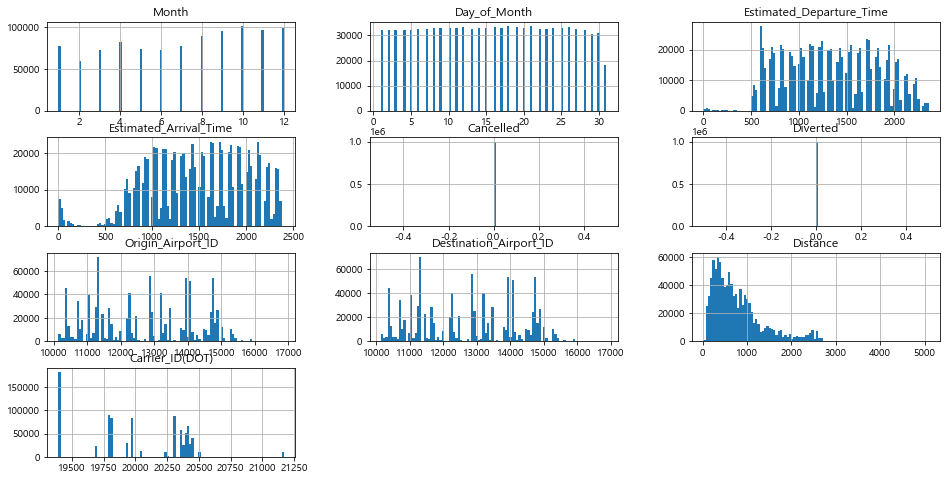

In [55]:
_ = train.hist(figsize=(16,8),bins=100)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [22]:
train.describe()

,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT)
count,1000000.000000,1000000.000000,890981.000000,890960.000000,1000000.0,1000000.0,1000000.000000,1000000.000000,1000000.000000,891003.000000
mean,6.945156,15.764842,1341.153019,1493.295934,0.0,0.0,12696.278484,12701.813986,784.078499,19997.388093
std,3.462506,8.763515,489.814011,520.803494,0.0,0.0,1514.938441,1515.213044,590.790469,404.268639
min,1.000000,1.000000,1.000000,1.000000,0.0,0.0,10135.000000,10135.000000,16.000000,19393.000000
25%,4.000000,8.000000,925.000000,1105.000000,0.0,0.0,11292.000000,11292.000000,350.000000,19790.000000
50%,7.000000,16.000000,1332.000000,1524.000000,0.0,0.0,12889.000000,12889.000000,623.000000,19977.000000
75%,10.000000,23.000000,1742.000000,1924.000000,0.0,0.0,14057.000000,14057.000000,1020.000000,20378.000000
max,12.000000,31.000000,2359.000000,2400.000000,0.0,0.0,16869.000000,16869.000000,5095.000000,21171.000000


In [23]:
train.describe(include='object')

,ID,Origin_Airport,Origin_State,Destination_Airport,Destination_State,Airline,Carrier_Code(IATA),Tail_Number,Delay
count,1000000,1000000,890985,1000000,890921,891080,891010,1000000,255001
unique,1000000,374,52,375,52,28,11,6430,2
top,TRAIN_000000,ORD,California,ORD,California,Southwest Airlines Co.,UA,N483HA,Not_Delayed
freq,1,50436,103482,50171,104347,182113,206211,530,210001


출발과 도착 공항코드와 ID 분포가 같을까?

In [31]:
train['Origin_Airport'].value_counts()

ORD    50436
ATL    44140
DEN    40300
LAX    31825
DFW    30879
       ...  
ADK       14
GST       13
DLG        9
AKN        8
BFM        6
Name: Origin_Airport, Length: 374, dtype: int64

In [32]:
train['Origin_Airport_ID'].value_counts()

13930    50436
10397    44140
11292    40300
12892    31825
11298    30879
         ...  
10165       14
11997       13
11336        9
10245        8
10562        6
Name: Origin_Airport_ID, Length: 374, dtype: int64

In [50]:
list(train['Origin_Airport'].value_counts()) == list(train['Origin_Airport_ID'].value_counts())

True

In [53]:
list(train['Destination_Airport'].value_counts()) == list(train['Destination_Airport_ID'].value_counts())

True

코드와 ID분포가 같으니 공항 ID만 써도 될 것 같다.

In [59]:
len(train['Origin_Airport'].unique())

374

In [64]:
train['Origin_Airport'].value_counts(normalize=True)

ORD    0.050436
ATL    0.044140
DEN    0.040300
LAX    0.031825
DFW    0.030879
         ...   
ADK    0.000014
GST    0.000013
DLG    0.000009
AKN    0.000008
BFM    0.000006
Name: Origin_Airport, Length: 374, dtype: float64

데이터 라벨링을 위한 전처리 과정</br>
1. ID, Cancelled, Diverted 특성 제거
2. Origin_Airport와 Origin_Airport_ID 중 하나 제거
3. Destination_Airport와 Destination_Airport_ID 중 하나 제거
4. Estimated_Departure_Time, Estimated_Arrival_Time 결측치 채움
5. Origin_State, Destination_State 결측치 채움

5. Origin_State, Destination_State 결측치 채움

In [65]:
train['Origin_State'].value_counts()

California                                        103482
Texas                                              89074
Florida                                            66426
Illinois                                           58765
New York                                           43613
Georgia                                            42244
Colorado                                           39795
North Carolina                                     35411
Virginia                                           34088
Washington                                         25555
Pennsylvania                                       23776
Nevada                                             23459
Arizona                                            22485
Michigan                                           22441
New Jersey                                         21942
Massachusetts                                      18187
Missouri                                           17358
Minnesota                      

In [71]:
train.loc[train['Origin_State'].isna(),'Origin_Airport'].value_counts()

ORD    5518
ATL    4738
DEN    4480
LAX    3487
DFW    3352
       ... 
BFM       1
ROP       1
AKN       1
PPG       1
DLG       1
Name: Origin_Airport, Length: 373, dtype: int64

In [69]:
train[train['Origin_Airport'] == 'EWR']

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,NaN,N66825,Not_Delayed
17,TRAIN_000017,8,10,1400.0,1624.0,0,0,EWR,11618,New Jersey,JAX,12451,Florida,820.0,NaN,UA,20452.0,N722YX,NaN
54,TRAIN_000054,3,12,1800.0,2109.0,0,0,EWR,11618,New Jersey,LAX,12892,California,2454.0,United Air Lines Inc.,UA,NaN,N14107,NaN
76,TRAIN_000076,11,16,1745.0,2130.0,0,0,EWR,11618,New Jersey,SFO,14771,California,2565.0,Alaska Airlines Inc.,AS,19930.0,N517AS,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999837,TRAIN_999837,5,16,845.0,1218.0,0,0,EWR,11618,New Jersey,EYW,11624,Florida,1196.0,Republic Airlines,UA,20452.0,N640RW,NaN
999860,TRAIN_999860,7,11,1836.0,1957.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,JetBlue Airways,B6,20409.0,N216JB,NaN
999934,TRAIN_999934,10,19,1408.0,1531.0,0,0,EWR,11618,New Jersey,PIT,14122,NaN,319.0,Republic Airlines,UA,20452.0,N744YX,NaN
999951,TRAIN_999951,4,28,845.0,1122.0,0,0,EWR,11618,New Jersey,LAS,12889,Nevada,2227.0,NaN,UA,19977.0,N39461,NaN


In [90]:
len(train['Origin_State'].unique())

53

In [96]:
train.loc[train['Origin_State'].isna()]

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
5,TRAIN_000005,4,13,1545.0,NaN,0,0,EWR,11618,NaN,DCA,11278,Virginia,199.0,Republic Airlines,UA,20452.0,N657RW,Not_Delayed
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,BWI,10821,NaN,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,WN,19393.0,N765SW,Not_Delayed
18,TRAIN_000018,8,11,1215.0,1258.0,0,0,CRW,11146,NaN,ORD,13930,NaN,416.0,NaN,NaN,20046.0,N440AW,NaN
25,TRAIN_000025,12,24,NaN,2020.0,0,0,STS,15023,NaN,SEA,14747,Washington,618.0,Horizon Air,AS,19687.0,N451QX,NaN
31,TRAIN_000031,8,19,600.0,847.0,0,0,LAS,12889,NaN,DEN,11292,Colorado,628.0,United Air Lines Inc.,UA,19977.0,N17245,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999981,TRAIN_999981,10,19,2130.0,2255.0,0,0,LAX,12892,NaN,SFO,14771,California,337.0,Compass Airlines,AA,21167.0,N215NN,NaN
999994,TRAIN_999994,6,26,NaN,1800.0,0,0,DAL,11259,NaN,SFO,14771,California,1476.0,SkyWest Airlines Inc.,AS,20304.0,N173SY,NaN
999995,TRAIN_999995,9,18,936.0,1243.0,0,0,ORD,13930,NaN,PHL,14100,NaN,678.0,United Air Lines Inc.,UA,19977.0,N477UA,NaN
999996,TRAIN_999996,5,30,920.0,1028.0,0,0,FAR,11637,NaN,MSP,13487,Minnesota,223.0,SkyWest Airlines Inc.,DL,NaN,N439SW,NaN


### labeled_data 살펴보기

In [83]:
train.dropna()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
13,TRAIN_000013,9,19,615.0,706.0,0,0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,UA,20304.0,N165SY,Not_Delayed
19,TRAIN_000019,7,14,1907.0,2145.0,0,0,BDL,10529,Connecticut,ATL,10397,Georgia,859.0,Delta Air Lines Inc.,DL,19790.0,N962DN,Not_Delayed
42,TRAIN_000042,10,24,1005.0,1130.0,0,0,ORD,13930,Illinois,STL,15016,Missouri,258.0,Trans States Airlines,UA,20237.0,N835HK,Not_Delayed
59,TRAIN_000059,5,2,1732.0,1935.0,0,0,RIC,14524,Virginia,MCO,13204,Florida,667.0,JetBlue Airways,B6,20409.0,N258JB,Not_Delayed
63,TRAIN_000063,12,28,1820.0,1925.0,0,0,OAK,13796,California,BUR,10800,California,325.0,Southwest Airlines Co.,WN,19393.0,N777QC,Not_Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999943,TRAIN_999943,9,30,1100.0,1155.0,0,0,IND,12339,Indiana,LAS,12889,Nevada,1590.0,Southwest Airlines Co.,WN,19393.0,N8532S,Not_Delayed
999950,TRAIN_999950,11,7,1401.0,1950.0,0,0,PSP,14262,California,ORD,13930,Illinois,1652.0,United Air Lines Inc.,UA,19977.0,N896UA,Not_Delayed
999955,TRAIN_999955,4,12,1310.0,1356.0,0,0,SEA,14747,Washington,PDX,14057,Oregon,129.0,Horizon Air,AS,19687.0,N432QX,Delayed
999985,TRAIN_999985,8,8,1914.0,2039.0,0,0,RDU,14492,North Carolina,JAX,12451,Florida,407.0,Frontier Airlines Inc.,F9,20436.0,N316FR,Not_Delayed


In [87]:
train[~train['Delay'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255001 entries, 5 to 999992
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        255001 non-null  object 
 1   Month                     255001 non-null  int64  
 2   Day_of_Month              255001 non-null  int64  
 3   Estimated_Departure_Time  227160 non-null  float64
 4   Estimated_Arrival_Time    227317 non-null  float64
 5   Cancelled                 255001 non-null  int64  
 6   Diverted                  255001 non-null  int64  
 7   Origin_Airport            255001 non-null  object 
 8   Origin_Airport_ID         255001 non-null  int64  
 9   Origin_State              227145 non-null  object 
 10  Destination_Airport       255001 non-null  object 
 11  Destination_Airport_ID    255001 non-null  int64  
 12  Destination_State         227323 non-null  object 
 13  Distance                  255001 non-null  f